# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [4]:
print(df.isna().sum()/len(df))

Age                   0.207317
Gender                0.000000
Income                0.000000
Education             0.000000
Marital Status        0.000000
Number of Children    0.000000
Home Ownership        0.000000
Credit Score          0.000000
dtype: float64


20% dos dados estão faltantes na coluna Age, algo que não podemos simplesmente excluir visto que é uma % bem grande dos nossos dados. Teremos que trata-los

In [5]:
df[df.isna().any(axis=1)]

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High
10,NaN,Female,"90.000,00",High School Diploma,Married,1,Owned,High
11,NaN,Male,"135.000,00",Bachelor's Degree,Married,0,Owned,High
12,NaN,Female,"35.000,00",High School Diploma,Single,0,Rented,Low
13,NaN,Male,"55.000,00",Associate's Degree,Single,0,Rented,Average
14,NaN,Female,"70.000,00",Bachelor's Degree,Married,2,Owned,High
15,NaN,Male,"95.000,00",Master's Degree,Single,0,Owned,High
16,NaN,Female,"85.000,00",Doctorate,Married,1,Owned,High
17,NaN,Male,"125.000,00",High School Diploma,Married,0,Owned,High


In [6]:
df_sem_nulos = df.dropna()
df_sem_nulos['Age'] = df_sem_nulos['Age'].astype(int)
df_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 130 non-null    int32 
 1   Gender              130 non-null    object
 2   Income              130 non-null    object
 3   Education           130 non-null    object
 4   Marital Status      130 non-null    object
 5   Number of Children  130 non-null    int64 
 6   Home Ownership      130 non-null    object
 7   Credit Score        130 non-null    object
dtypes: int32(1), int64(1), object(6)
memory usage: 8.6+ KB


C:\Users\Computador\AppData\Local\Temp\ipykernel_1528\2442618257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_nulos['Age'] = df_sem_nulos['Age'].astype(int)


In [7]:
media = df_sem_nulos.groupby(['Gender', 'Education'])['Age'].mean()
media = media. reset_index()
media = media.rename(columns={'Age': 'Age_mean'})
display(media)


,Gender,Education,Age_mean
0,Female,Associate's Degree,26.888889
1,Female,Bachelor's Degree,34.666667
2,Female,Doctorate,41.900000
3,Female,High School Diploma,33.500000
4,Female,Master's Degree,35.400000
5,Male,Associate's Degree,40.363636
6,Male,Bachelor's Degree,37.000000
7,Male,Doctorate,38.500000
8,Male,High School Diploma,40.666667
9,Male,Master's Degree,39.840000


In [8]:
df_merged = df.merge(media, on=['Gender', 'Education'], how='left')
df_merged['Age_mean'] = df_merged['Age_mean'].astype(int)
df_merged['Age'] = df_merged['Age'].fillna(df_merged['Age_mean'])
df_merged['Age'] = df_merged['Age'].astype(int)
df_merged.drop('Age_mean', axis=1, inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int32 
 1   Gender              164 non-null    object
 2   Income              164 non-null    object
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int32(1), int64(1), object(6)
memory usage: 9.7+ KB


Como havia dito antes, decidi por substituir os valores pela média da coluna Genêro e escolaridade. Escolhi as duas, pois com a coluna escolaridade podemos deduzir que a pessoa tem uma idade miníma. Por exemplo, se a pessoa tem doutorado, ela teria que ter passado pela graduação e mestrado, o que leva a crer que no minimo 06 anos de estudo e então deveria ser mais velha que 24 anos. Logicamente considerando que não temos nenhum gênio entre as pessoas da lista. 
A escolha da coluna Genêro foi devido ao fato de homens e mulheres terem diferentes metas na vida e se preocuparem com coisas diferentes, o que pode impactar na idade que se escolheu para cursar uma faculdade, mestrada ou doutorado.
No meu ponto de vista essas duas variaveis tem impacto grande na idade das pessoas e por esse motivo escolhi as duas para tirar a media e usar para preencher os valores nulos.

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [9]:
print('=======Genero=======')
print(df_merged['Gender'].unique(), '\n')
print('=======Formação=======')
print(df_merged['Education'].unique(), '\n')
print('=======Estatus social=======')
print(df_merged['Marital Status'].unique(), '\n')
print('=======Caso propia=======')
print(df_merged['Home Ownership'].unique(), '\n')
print('=======Score de crédito=======')
print(df_merged['Credit Score'].unique(), '\n')

=======Genero=======
['Female' 'Male'] 

=======Formação=======
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"] 

=======Estatus social=======
['Single' 'Married'] 

=======Caso propia=======
['Rented' 'Owned'] 

=======Score de crédito=======
['High' 'Average' 'Low'] 



In [10]:
df_merged['Education'] = df_merged['Education'].str.replace('\'s', '')

# Verifica se a substituição ocorreu corretamente
print(df_merged['Education'].unique(), '\n')

['Bachelor Degree' 'Master Degree' 'Doctorate' 'High School Diploma'
 'Associate Degree'] 



Apenas fiz a correção do "'S" de alguns itens da coluna "Education", pois podem gerar alguns problemas no código futuramente

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [11]:
df_merged.describe()

,Age,Number of Children
count,164.000000,164.000000
mean,37.414634,0.652439
std,7.734000,0.883346
min,25.000000,0.000000
25%,31.000000,0.000000
50%,37.000000,0.000000
75%,43.000000,1.000000
max,53.000000,3.000000


In [12]:
fig = px.box(df_merged, y="Age")
fig.show()

Aparentemente nada fora do normal

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [13]:
df_merged.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

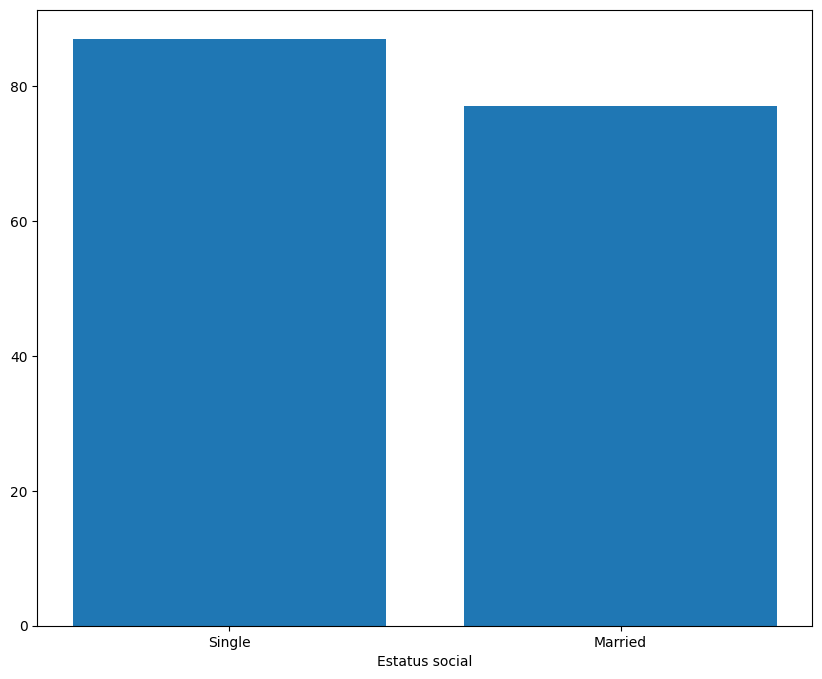

In [14]:
plt.figure(figsize=(10,8))
plt.bar(df_merged['Marital Status'].unique(), df_merged['Marital Status'].value_counts())
plt.xlabel('Estatus social')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

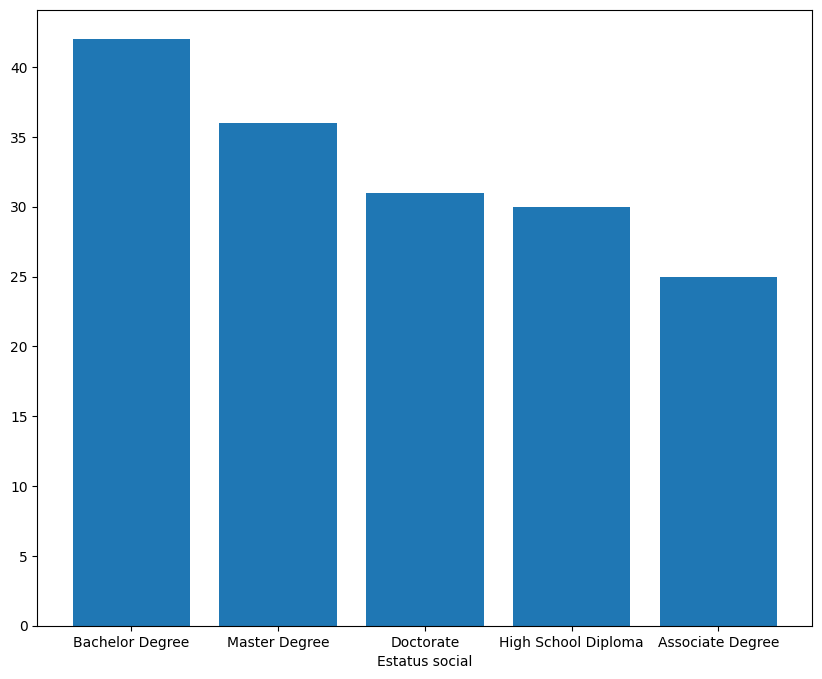

In [15]:
plt.figure(figsize=(10,8))
plt.bar(df_merged['Education'].unique(), df_merged['Education'].value_counts())
plt.xlabel('Estatus social')
plt.show

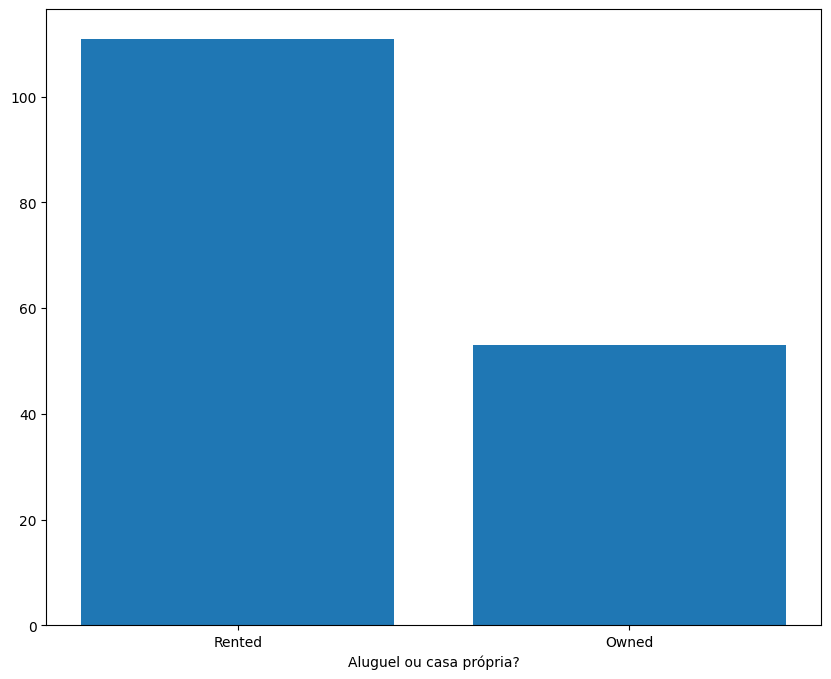

In [16]:
plt.figure(figsize=(10,8))
plt.bar(df_merged['Home Ownership'].unique(), df_merged['Home Ownership'].value_counts())
plt.xlabel('Aluguel ou casa própria?')
plt.show()

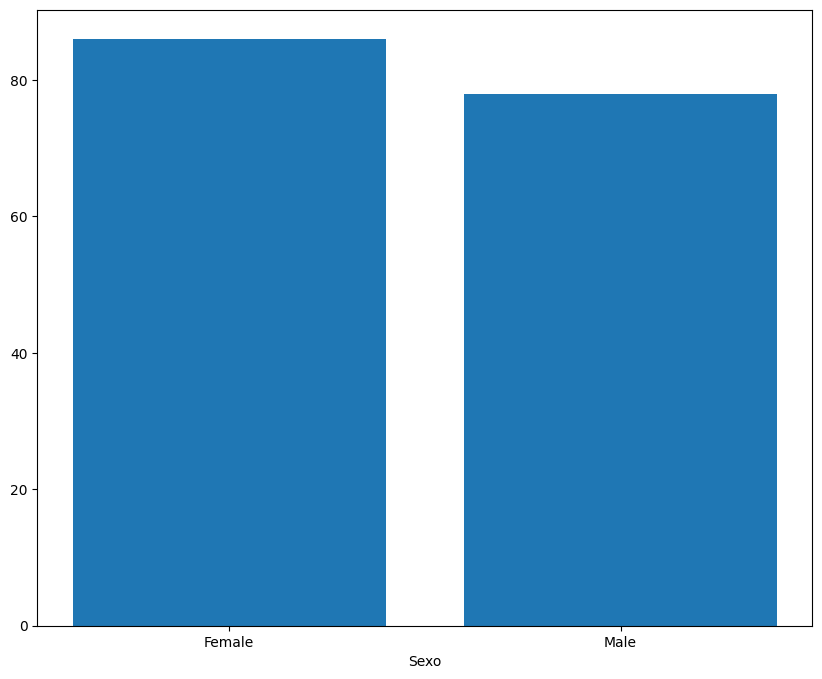

In [17]:
plt.figure(figsize=(10,8))
plt.bar(df_merged['Gender'].unique(), df_merged['Gender'].value_counts())
plt.xlabel('Sexo')
plt.show()

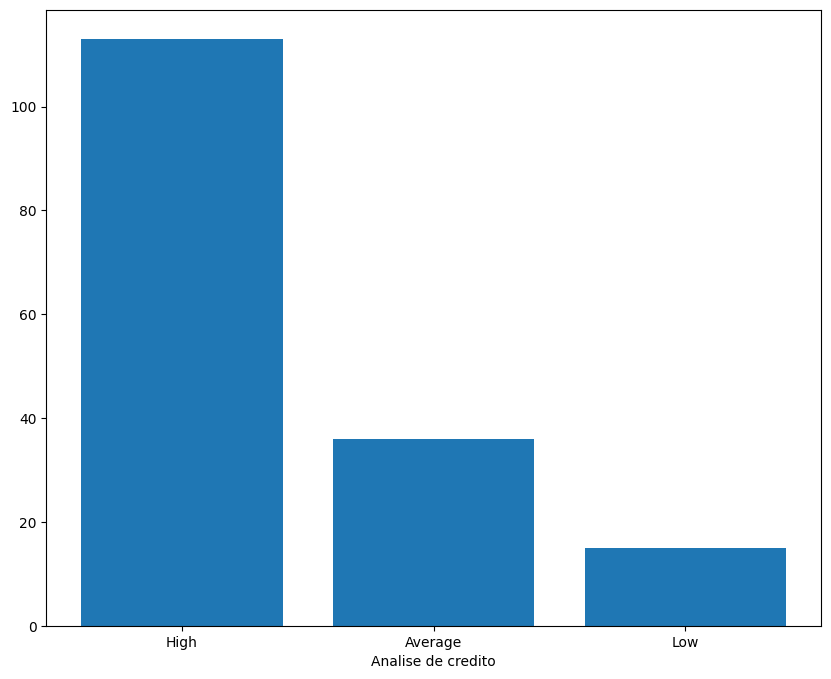

In [18]:
plt.figure(figsize=(10,8))
plt.bar(df_merged['Credit Score'].unique(), df_merged['Credit Score'].value_counts())
plt.xlabel('Analise de credito')
plt.show()

Para as colunas Education, Home Ownership e Credit Score teríamos que fazer um balanceamento. Demais colunas tem uma leva variação entre variaveis mas é um variação tão pequena que nçao irá interferir na predição do modelo que iremos montar.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Não foram encontrados outliers

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



_____________________________________________________________________________________________________________

*   Existe relação entre a idade e o status civil?

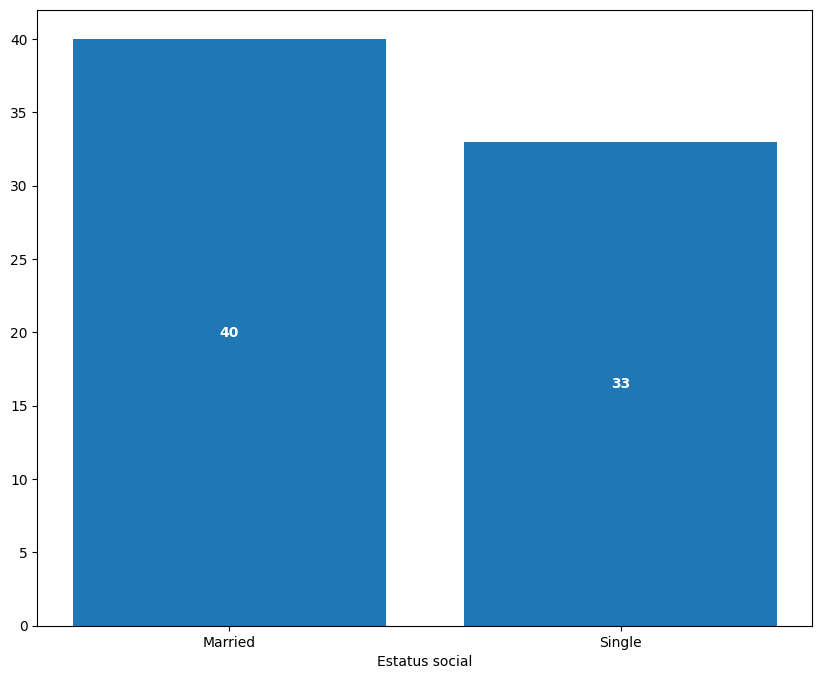

In [19]:
relacao = df_merged.groupby('Marital Status')['Age'].mean().reset_index()
relacao['Age'] = relacao['Age'].astype(int)


plt.figure(figsize=(10,8))

barras = plt.bar(relacao['Marital Status'], relacao['Age'])
plt.bar_label(barras, labels=relacao['Age'], fontweight='bold', label_type='center', color='white')
plt.xlabel('Estatus social')
plt.show()


Insight - Existe relação que é a de que pessoas casadas, na média, são mais velhas.

------------------------------------

*   Qual a relação entre o score de crédito e o nível de escolaridade?

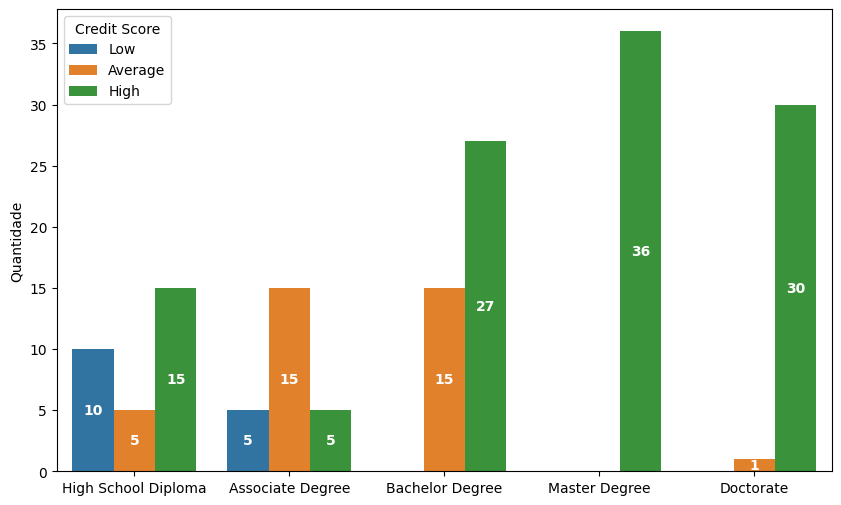

In [20]:
credit_score_ = {'Low': 1, 'Average': 2, 'High': 3}
df_merged['Credit_Score_#'] = df_merged['Credit Score'].map(credit_score_)

df_grouped = df_merged.groupby(['Education', 'Credit Score'])['Credit_Score_#'].count().reset_index()

ordem = ['High School Diploma', 'Associate Degree', 'Bachelor Degree', 'Master Degree', 'Doctorate']
hue_order=['Low', 'Average', 'High']

plt.figure(figsize=(10,6))
barra_empilhadas = sns.barplot(data=df_grouped, x='Education', y='Credit_Score_#', hue='Credit Score', order=ordem, hue_order=hue_order)
for container in barra_empilhadas.containers:
    plt.bar_label(container, label_type='center', color='white', fontweight='bold')

plt.ylabel('Quantidade')
plt.xlabel('')
plt.legend(loc='upper left', title='Credit Score')

plt.show()


Vemos que quanto maiot o nível de educação, maior é a probabilidade de o score ser alto.

----------------------------------------------------
*  O salário parece influenciar na idade?

In [21]:
df_merged['Income'] = df_merged['Income'].str.replace('.', '')
df_merged['Income'] = df_merged['Income'].str.replace(',', '.')
df_merged['Income'] = df_merged['Income'].astype(float)

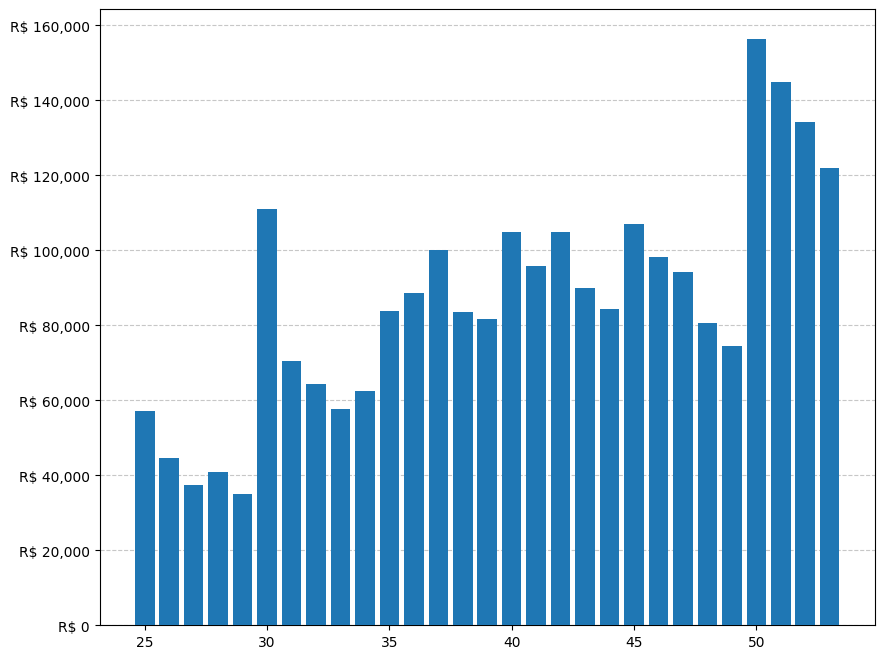

In [22]:
import matplotlib.ticker as mtick

df_grouped = df_merged.groupby('Age')['Income'].mean().reset_index().round(2)

plt.figure(figsize=(10,8))

plt.bar(df_grouped['Age'], df_grouped['Income'], zorder=3)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.0f}'))
plt.grid(True, axis='y', zorder=0, linestyle='--', alpha=0.7,)
plt.show()

Sim, mas na verdade a idade influência o salário e não o caso contrário, como mencionado na pergunta. Constatamos que quanto mais velhos mais tendem a receber um salário mais alto. 

Salvo exceção para a idade de 30 anos, que apareceu com uma média bem alta e fora do padrão.

-------------------------------
* O salário parece influenciar no Score de Crédito?


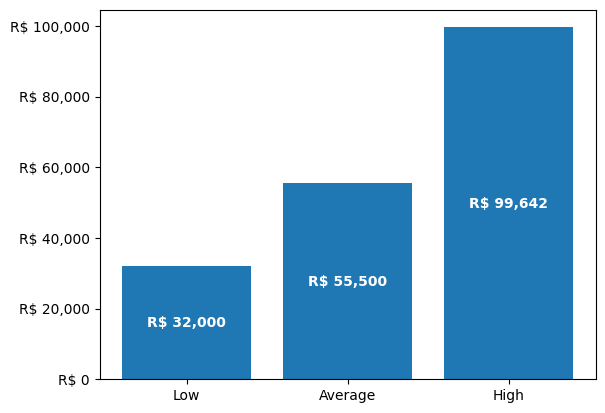

In [23]:
df_salario = df_merged.groupby('Credit Score')['Income'].mean().reset_index().round(2)

ordem_ = ['Low', 'Average', 'High']
df_salario = df_salario.set_index('Credit Score').loc[ordem_].reset_index()
labels_formatados = df_salario['Income'].apply(lambda x: f'R$ {x:,.0f}')

barras_salario = plt.bar(df_salario['Credit Score'], df_salario['Income'])
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.0f}'))
plt.bar_label(barras_salario,  labels=labels_formatados, label_type='center', color='white', fontweight='bold')
plt.show()

Sim, quanto maior o salário maior será o score de credito

----------------------------

* Clientes com casa própria tendem a ter um score mais alto?

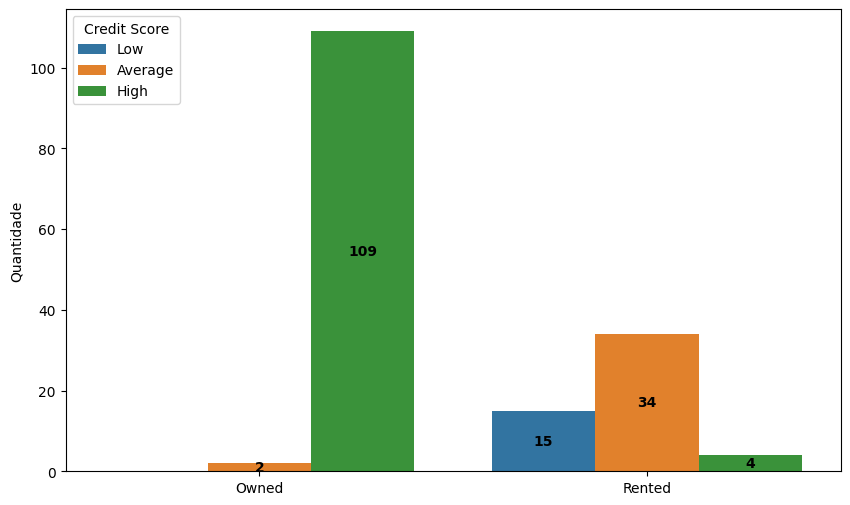

In [24]:
df_grouped = df_merged.groupby(['Home Ownership', 'Credit Score'])['Credit_Score_#'].count().reset_index()

hue_order=['Low', 'Average', 'High']

plt.figure(figsize=(10,6))
barra_empilhadas = sns.barplot(data=df_grouped, x='Home Ownership', y='Credit_Score_#', hue='Credit Score', hue_order=hue_order)
for container in barra_empilhadas.containers:
    plt.bar_label(container, label_type='center', fontweight='bold')

plt.ylabel('Quantidade')
plt.xlabel('')
plt.legend(loc='upper left', title='Credit Score')

Sim, pelo gráfico notamos que quem tem casa própria tende a ter um score mais alto

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

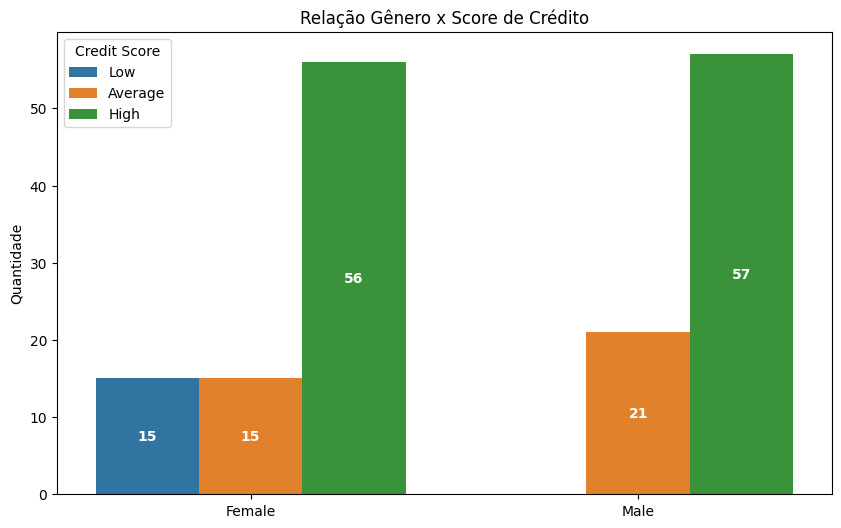

In [25]:
credit_score_ = {'Low': 1, 'Average': 2, 'High': 3}
df_merged['Credit_Score_#'] = df_merged['Credit Score'].map(credit_score_)

df_grouped = df_merged.groupby(['Gender', 'Credit Score'])['Credit_Score_#'].count().reset_index()

hue_order=['Low', 'Average', 'High']

plt.figure(figsize=(10,6))
barra_empilhadas = sns.barplot(data=df_grouped, x='Gender', y='Credit_Score_#', hue='Credit Score', hue_order=hue_order)
for container in barra_empilhadas.containers:
    plt.bar_label(container, label_type='center', color='white', fontweight='bold')

plt.ylabel('Quantidade')
plt.xlabel('')
plt.legend(loc='upper left', title='Credit Score')
plt.title('Relação Gênero x Score de Crédito')
plt.show()

Homens tem score maiores que mulheres nesta base

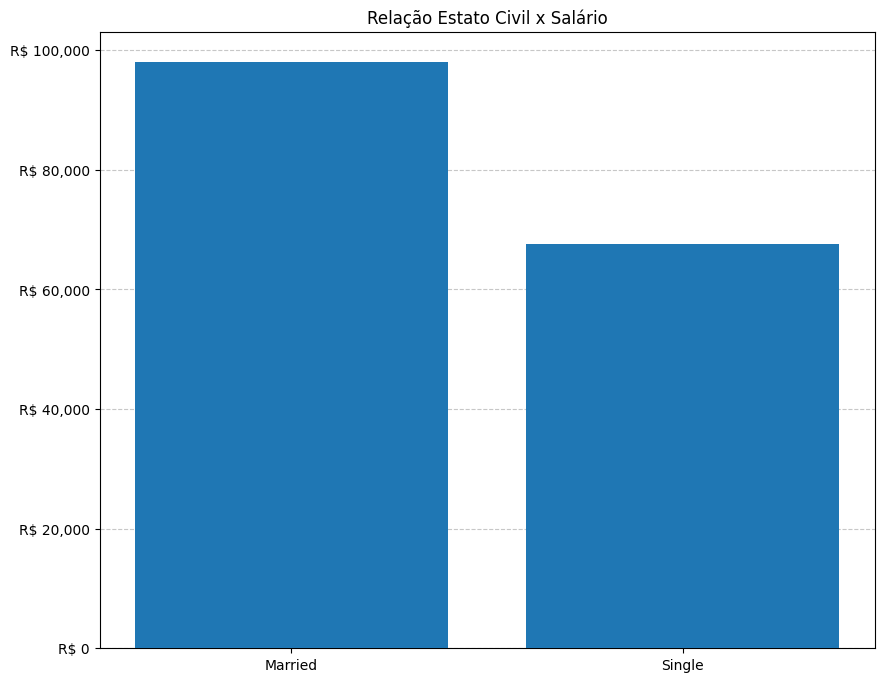

In [26]:
import matplotlib.ticker as mtick

df_grouped = df_merged.groupby('Marital Status')['Income'].mean().reset_index().round(2)

plt.figure(figsize=(10,8))

plt.bar(df_grouped['Marital Status'], df_grouped['Income'], zorder=3)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.0f}'))
plt.grid(True, axis='y', zorder=0, linestyle='--', alpha=0.7,)
plt.title('Relação Estato Civil x Salário')
plt.show()

Pessoas cadas ganham mais nesta base de dados

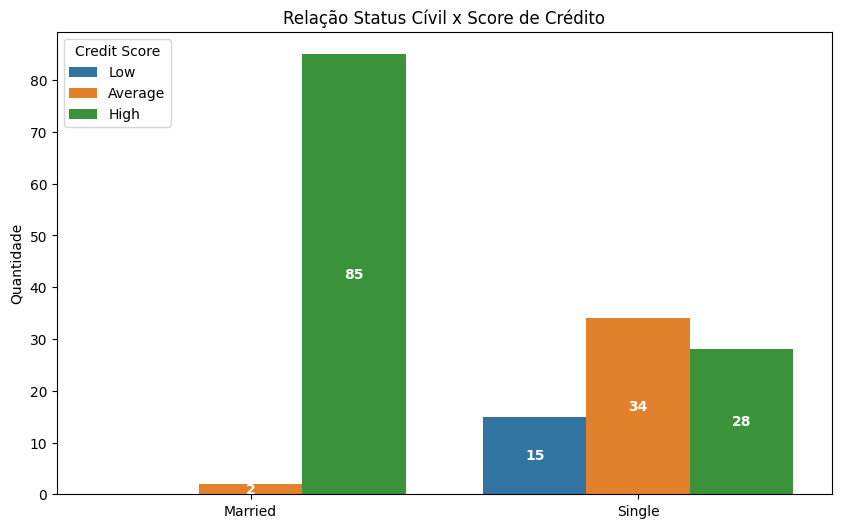

In [27]:
credit_score_ = {'Low': 1, 'Average': 2, 'High': 3}
df_merged['Credit_Score_#'] = df_merged['Credit Score'].map(credit_score_)

df_grouped = df_merged.groupby(['Marital Status', 'Credit Score'])['Credit_Score_#'].count().reset_index()

hue_order=['Low', 'Average', 'High']

plt.figure(figsize=(10,6))
barra_empilhadas = sns.barplot(data=df_grouped, x='Marital Status', y='Credit_Score_#', hue='Credit Score', hue_order=hue_order)
for container in barra_empilhadas.containers:
    plt.bar_label(container, label_type='center', color='white', fontweight='bold')

plt.ylabel('Quantidade')
plt.xlabel('')
plt.legend(loc='upper left', title='Credit Score')
plt.title('Relação Status Cívil x Score de Crédito')
plt.show()

Pessoas casadas possuem score mais alto, segundo nossa base de dados

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

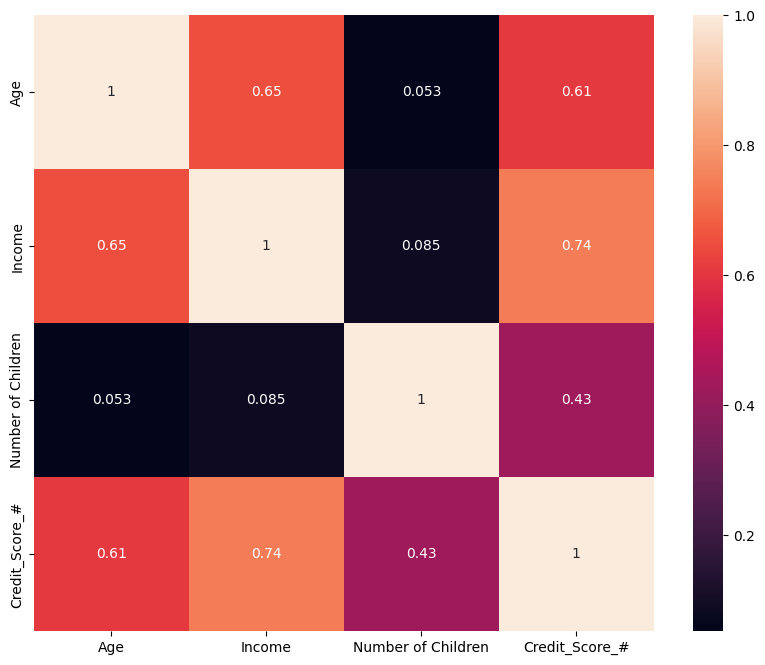

In [28]:
df_numerica = df_merged.select_dtypes(include=['int', 'float'])
df_numerica_cor = df_numerica.corr()

plt.figure(figsize=(10,8))
sns.heatmap(df_numerica_cor, annot=True)
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

alta correlação entre income e idade, idade e credit score e income e credit score. Todas fazem sentido

Baixa correlação com a variavel número de filhos, o que, em minha opinião faz sentido.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [29]:
gender = {'Male': 0, 'Female': 1}
df_merged['Gender'] = df_merged['Gender'].map(gender)

marital_status = {'Single': 0, 'Married': 1}
df_merged['Marital Status'] = df_merged['Marital Status'].map(marital_status)

df_merged = pd.get_dummies(df_merged, columns=['Education'], drop_first=True, dtype=int)

home_owner = {'Owned':0, 'Rented':1}
df_merged['Home Ownership'] = df_merged['Home Ownership'].map(home_owner)

df_merged.drop('Credit Score', axis=1, inplace=True)

df_merged

,Age,Gender,Income,Marital Status,Number of Children,Home Ownership,Credit_Score_#,Education_Bachelor Degree,Education_Doctorate,Education_High School Diploma,Education_Master Degree
0,25,1,50000.0,0,0,1,3,1,0,0,0
1,30,0,100000.0,1,2,0,3,0,0,0,1
2,35,1,75000.0,1,1,0,3,0,1,0,0
3,40,0,125000.0,0,0,0,3,0,0,1,0
4,45,1,100000.0,1,3,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
159,29,1,27500.0,0,0,1,1,0,0,1,0
160,34,0,47500.0,0,0,1,2,0,0,0,0
161,39,1,62500.0,1,2,0,3,1,0,0,0
162,44,0,87500.0,0,0,0,3,0,0,0,1


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

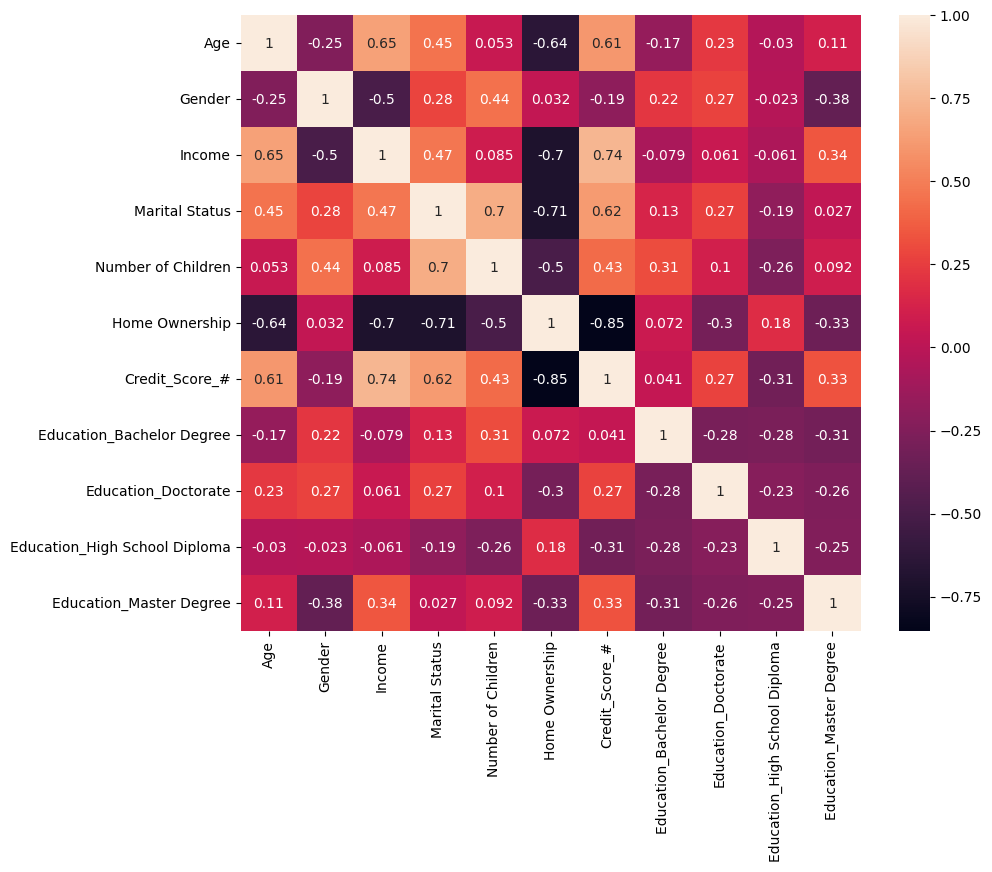

In [30]:
df_numerica_novo = df_merged.select_dtypes(include=['int', 'float'])
df_numerica_cor_novo = df_numerica_novo.corr()

plt.figure(figsize=(10,8))
sns.heatmap(df_numerica_cor_novo, annot=True)
plt.show()

Podemos oberservar uma grande correlação entre número de filhos e estado civil, neste caso quanto mais filho maior a tendência de ser casado.
Uma relação negativa de donos de casa com salário, estado civil e idade, e um leve negativo com pessoas com doutorados e mestrdos. A relação negativa se deve, pois o valor 1 é para quem está alugando e o valor 0 para quem possui casa propria, ou seja, quanto maior o salário, se a pessoa é casada, maior for a idade, e se ela tiver um doutorado ou mestrado ela provavelmente tem uma casa propria segundo a nossa base de dados.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [31]:
x = df_numerica_novo.drop('Credit_Score_#', axis=1)
y = df_numerica_novo['Credit_Score_#']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [34]:
print("Tamanho de X_train:", x_train.shape)
print("Tamanho de X_test:", x_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)
print("Tamanho total da base:", df_numerica_novo.shape)

Tamanho de X_train: (123, 10)
Tamanho de X_test: (41, 10)
Tamanho de y_train: (123,)
Tamanho de y_test: (41,)
Tamanho total da base: (164, 11)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

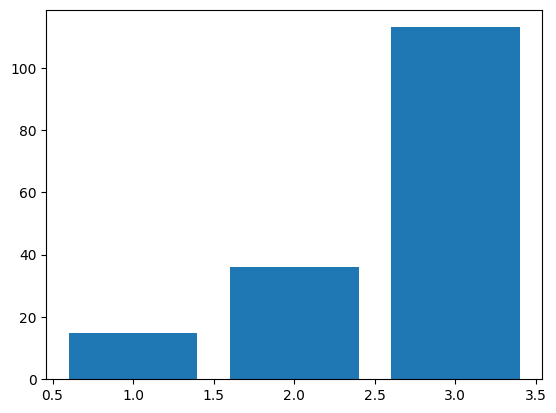

In [35]:
plt.bar(df_merged['Credit_Score_#'].unique(), df_merged['Credit_Score_#'].value_counts())
plt.show()

In [36]:
print((df_merged['Credit_Score_#'].value_counts(normalize=True) * 100))

Credit_Score_#
3    68.902439
2    21.951220
1     9.146341
Name: proportion, dtype: float64


Não está balanceada

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print((y_train_balanced.value_counts(normalize=True) * 100))

Distribuição das classes após o balanceamento:
Credit_Score_#
2    33.333333
1    33.333333
3    33.333333
Name: proportion, dtype: float64
